In [1]:
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## LSA for topic analysis

Since we did everything prior with LSA, we'll continue that here. Latent Semantic Analysis is a technique for creating a vector representation of a document. Having a vector representation of a document gives you a way to compare documents for their similarity by calculating the distance between the vectors. This in turn means you can do handy things like classifying documents to determine which of a set of known topics they most likely belong to.

### Load TFDIF Vectorizer and Document Term Matrix from previous notebook

In [2]:
tfidf_vectorizer = joblib.load('pickled_files/tfidf_vectorizer')
document_term_matrix_sps = joblib.load('pickled_files/document_term_matrix_sps')
df = joblib.load('pickled_files/df')

In [3]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=df.index,
                                       columns=tfidf_vectorizer.get_feature_names())

### Compute SVD of Document Term Matrix

$$\text{Latent Semantic Analysis} = \text{Document Term Matrix} + \text{SVD}$$

In [4]:
from sklearn.decomposition import TruncatedSVD

In [5]:
n_components=1000
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [6]:
svd_matrix = SVD.fit_transform(document_term_matrix_sps)

In [7]:
sum(SVD.explained_variance_ratio_)

0.62928377267739088

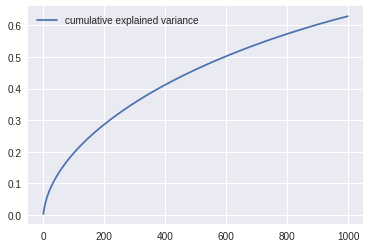

In [8]:
plt.plot(range(1000), np.cumsum(SVD.explained_variance_ratio_), label='cumulative explained variance')
plt.legend()

In [10]:
svd_matrix.shape

(6409, 1000)

In [11]:
document_term_matrix_df.shape

(6409, 28073)

### Load SVD Matrix with Documents and Labels - LSA components

We could

In [12]:
vocabulary_expression = pd.DataFrame(SVD.components_,
                                     index=component_names,
                                     columns=tfidf_vectorizer.get_feature_names()).T

In [13]:
vocabulary_expression.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_991,component_992,component_993,component_994,component_995,component_996,component_997,component_998,component_999,component_1000
aa,0.000231,0.000857,-0.000053,0.000205,0.000463,0.000184,-0.001229,0.000302,0.000525,0.000795,...,-0.000086,0.000599,-0.000168,0.002515,-0.000910,0.002887,-0.001374,0.002252,-0.001557,0.001246
aaai,0.000770,0.001408,-0.000160,0.000637,-0.000067,-0.000233,0.000391,-0.000635,-0.001097,-0.002026,...,-0.012845,-0.004886,-0.000629,-0.006658,-0.009890,0.006494,0.005248,-0.010542,0.009644,0.007457
aaccount,0.000124,-0.000097,-0.000024,0.000065,-0.000071,0.000053,-0.000007,-0.000316,-0.000606,0.000047,...,0.001905,-0.000025,0.000952,-0.002675,0.001545,0.001681,0.000541,0.003648,0.001395,-0.003791
aachen,0.000113,0.000353,0.000031,0.000042,-0.000009,0.000030,0.000066,0.000008,-0.000304,-0.000623,...,0.001996,0.000497,0.001426,-0.001372,0.000665,-0.000361,-0.000486,0.001038,-0.002214,0.000983
aaction,0.000190,-0.000122,0.000520,0.002539,-0.001128,-0.001038,0.000274,0.000471,-0.000158,0.000181,...,-0.002793,0.001761,-0.000130,-0.001589,0.002500,0.003471,-0.000896,-0.000973,-0.001092,-0.000530


##### Component 1

Looking at component 1, this looks like this would belong under the category of "business software"

In [14]:
vocabulary_expression[['component_1']].sort_values('component_1',ascending=False).head(10)

,component_1
software,0.292957
management,0.200806
microsoft,0.184565
application,0.148182
project,0.146150
office,0.144658
company,0.133866
business,0.122088
open,0.121182
service,0.114093


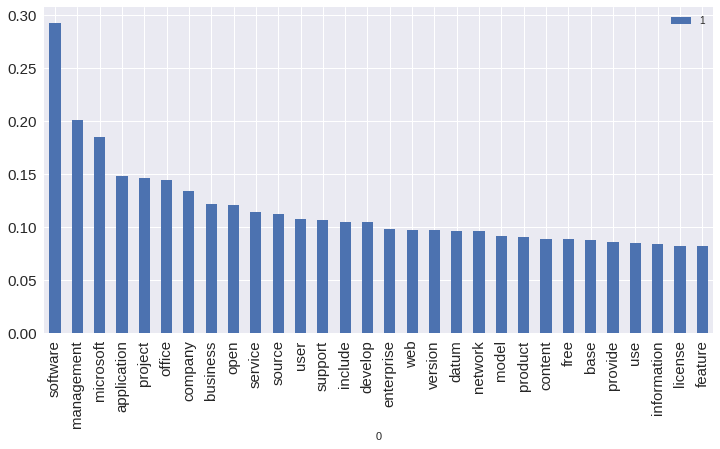

In [15]:
svd_1_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[0,:])
svd_1_list = list(svd_1_zip)
svd_1_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_1 = pd.DataFrame(svd_1_list[:30])
comp_1.set_index(0, inplace=True)
comp_1.plot(kind='bar', figsize=(12,6),fontsize=15)

##### Component 2

Looking at component 2, this looks like this would belong under the category of "machine learning". The values that are negative look like they are words that a related to business software. For example, you look at the words like "Microsoft", "Software", "Office" and "Management", they are all negative values in this component. While all the other words that are positive are words that are related to machine learning such as "neural network" or "model."

In [16]:
vocabulary_expression[['component_2']].sort_values('component_2',ascending=False).head(10)

,component_2
network,0.307572
neural,0.251222
model,0.242667
algorithm,0.242009
learn,0.204267
learning,0.196509
machine,0.182446
function,0.128517
artificial,0.118100
variable,0.109969


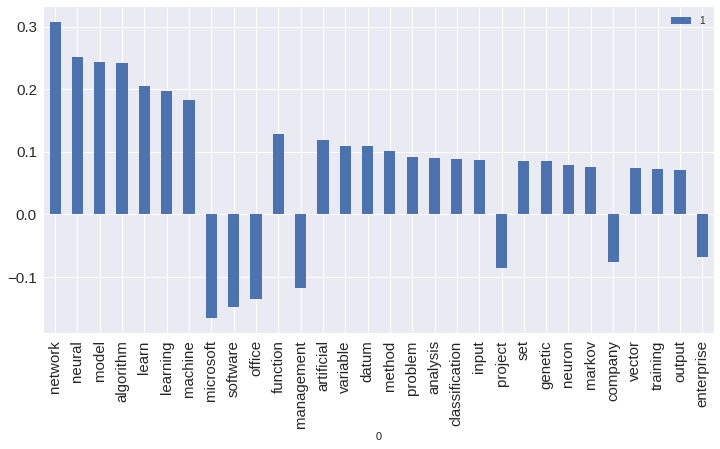

In [17]:
svd_2_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[1,:])
svd_2_list = list(svd_2_zip)
svd_2_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_2 = pd.DataFrame(svd_2_list[:30])
comp_2.set_index(0, inplace=True)
comp_2.plot(kind='bar', figsize=(12,6),fontsize=15)

##### Subplots of components

To take a look at a few of these other components to see some other patterns within the other components.

In [18]:
svd_1_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[0,:])
svd_1_list = list(svd_1_zip)
svd_1_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_1 = pd.DataFrame(svd_1_list[:10])
comp_1.set_index(0, inplace=True)

svd_2_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[1,:])
svd_2_list = list(svd_2_zip)
svd_2_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_2 = pd.DataFrame(svd_2_list[:10])
comp_2.set_index(0, inplace=True)

svd_3_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[2,:])
svd_3_list = list(svd_3_zip)
svd_3_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_3 = pd.DataFrame(svd_3_list[:10])
comp_3.set_index(0, inplace=True)

svd_4_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[3,:])
svd_4_list = list(svd_4_zip)
svd_4_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_4 = pd.DataFrame(svd_4_list[:10])
comp_4.set_index(0, inplace=True)

svd_5_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[4,:])
svd_5_list = list(svd_5_zip)
svd_5_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_5 = pd.DataFrame(svd_5_list[:10])
comp_5.set_index(0, inplace=True)

svd_6_zip = zip(tfidf_vectorizer.get_feature_names(), SVD.components_[5,:])
svd_6_list = list(svd_6_zip)
svd_6_list.sort(key = lambda x: abs(x[1]), reverse=True)
comp_6 = pd.DataFrame(svd_6_list[:10])
comp_6.set_index(0, inplace=True)


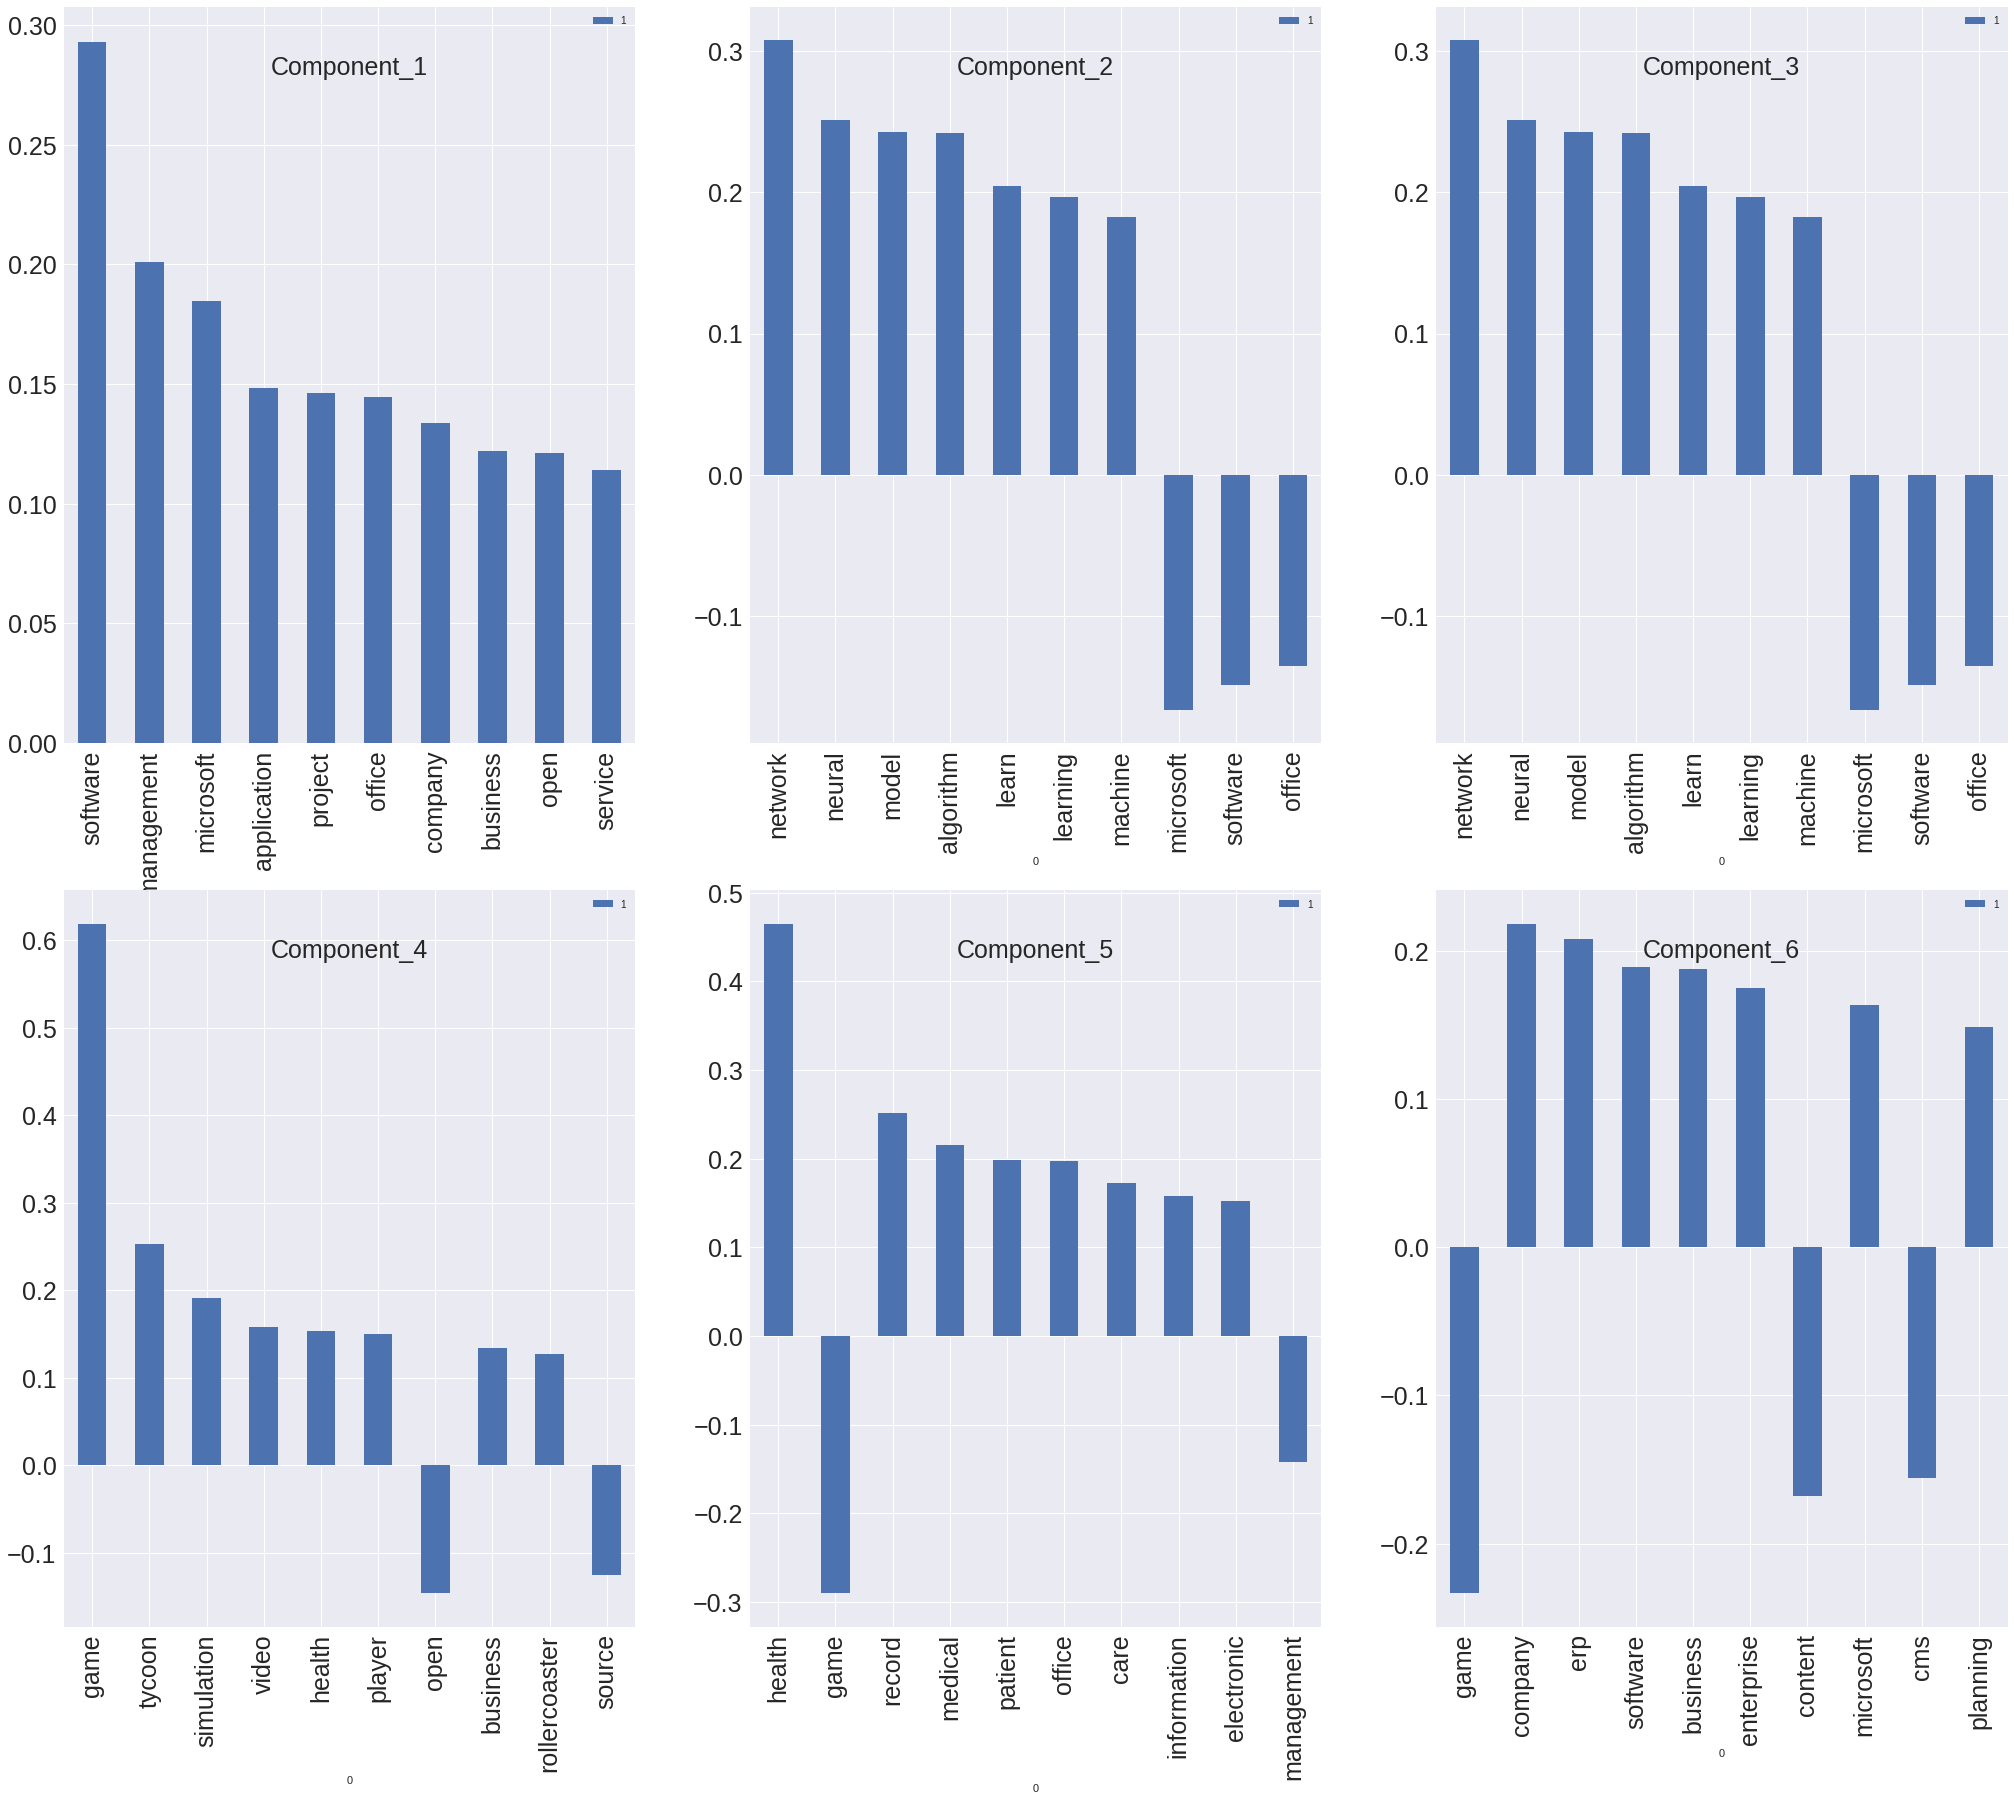

In [19]:
fig, ax = plt.subplots(figsize=(18,15), ncols=3, nrows=2)

left   =  0  
right  =  1.5   
bottom =  0    
top    =  1.5    
wspace =  0.2   
hspace =  0.2    

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

y_title_margin = 0.9

ax[0][0].set_title("Component_1", y = y_title_margin, fontsize=25)
ax[0][1].set_title("Component_2", y = y_title_margin, fontsize=25)
ax[0][2].set_title("Component_3", y = y_title_margin, fontsize=25)

comp_1.plot(kind='bar', fontsize=25, ax=ax[0][0])
comp_2.plot(kind='bar', fontsize=25, ax=ax[0][1])
comp_2.plot(kind='bar', fontsize=25, ax=ax[0][2])

ax[1][0].set_title("Component_4", y = y_title_margin, fontsize=25)
ax[1][1].set_title("Component_5", y = y_title_margin, fontsize=25)
ax[1][2].set_title("Component_6", y = y_title_margin, fontsize=25)

comp_4.plot(kind='bar', fontsize=25, ax=ax[1][0])
comp_5.plot(kind='bar', fontsize=25, ax=ax[1][1])
comp_6.plot(kind='bar', fontsize=25, ax=ax[1][2])

plt.show()

Based on the diagrams above, it looks like the components could fall under the following topics (these are my guesses):

    Component_1 = Business Software
    Component_2 = Machine Learning
    Component_3 = Machine Learning
    Component_4 = Business Video Game
    Component_5 = Healthcare Software
    Component_6 = Business Software

LSA grouped the words into components where the words are most likely to appear together in any given document. Isn't exactly topic analysis (that is for LDA that is below) or allows us to absolutely determine categories but it gives us a pretty good approximation for possible topics/categories

## Latent Dirichlet Analysis

Another way that we could analyze topics is to use LDA which stands for Latent Dirichlet Analysis. In LDA, the result of the topics are not assumed to be orthagonal such as in LSA (SVD). The Dirichlet distribution allows us to specify our prior beliefs about what data is likely to occur. This is Bayesian learning problem that generates a distribution based on paramters of prior beliefs. This model will usually generalize better than LSA and so people often will utilize LDA in order to perform topic modeling.

![LDA](https://git.generalassemb.ly/raw/michaelkim9/semantic_search/master/other_assets/lda.png)

LDA requires data in the form of integer counts as it gives you weight per word. So modifying feature values using TF-IDF and then using with LDA doesn't really fit in. So we'll need to create another document term matrix with the count vectorizer instead

### Term Document Matrix - CountVectorizer with LDA

In [20]:
from spacy.en import STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [21]:
vectorizer = CountVectorizer(min_df=2, stop_words=STOP_WORDS)
X = vectorizer.fit_transform(df['clean_text'])

In [22]:
lda   = LatentDirichletAllocation(n_topics=10, learning_method="batch", random_state=42)
model = lda.fit(X)

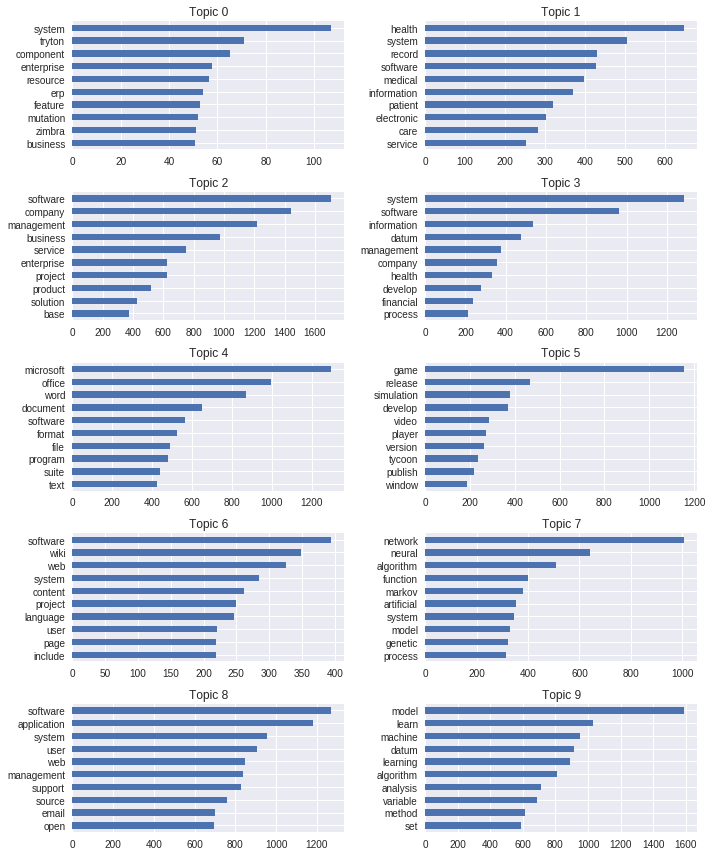

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

def display_topics(model, feature_names, no_words = 10, plot = False, plot_dim=(5,2)):
    topics_tokens = []
    for topic_idx, topic in enumerate(model.components_):
        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])
        topic_words = [(token, counts) for token, counts in topic[:-no_words - 1:-1]]
        topics_tokens.append(topic_words)
        
        if not plot:
            print ("Topic %d:" % (topic_idx))
            print (topic_words)
        
    if plot:
        plot_matrix = np.arange(10).reshape(5,2)
        fig, ax = plt.subplots(figsize=(10, 12), nrows=5, ncols=2)
        topics = [{key: value for key, value in topic} for topic in topics_tokens]
        row = 0
        
        for topic_id, topic in enumerate(topics):
            column = (0 if topic_id % 2 == 0 else 1)
            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])
                
            row += 1 if column == 1 else 0
        
        plt.tight_layout()
            

display_topics(model, vectorizer.get_feature_names(), no_words=10, plot=True)

And we have several groups of topics as we see above! From the word counts, we could get a pretty good idea of what each of these topics are. Below are my guesses as to what the topics might be.

    Topic 0: Enterprise Business System
    Topic 1: Healthcare Software
    Topic 2: Business Software
    Topic 3: Business Software
    Topic 4: Microsoft Office Software
    Topic 5: Video Game Software
    Topic 6: Web/Wiki Software
    Topic 7: Neural Networks
    Topic 8: Business Software
    Topic 9: Machine Learning

It looks like more of the topics were related to business software. This makes sense since most of our PostGres database included documents that were mostly about business software.

### Topic Document Matrix

Below we're going to create a Topic Document matrix in order to do some additional EDA on these topics.

![top_doc_matrix](https://git.generalassemb.ly/raw/michaelkim9/semantic_search/master/other_assets/top_doc_matrix.png)

In [24]:
comp = model.transform(X)
document_topics = pd.DataFrame(comp, columns=["topic %d" % i for i in range(comp.shape[1])])
document_topics.head()

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,0.000547,0.000547,0.000547,0.139373,0.043137,0.000547,0.079267,0.000547,0.000547,0.734944
1,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.131174,0.001235,0.001235,0.858948
2,0.000500,0.000500,0.000500,0.000500,0.049033,0.000500,0.000500,0.000500,0.000500,0.946966
3,0.001493,0.001493,0.001493,0.001493,0.001493,0.001493,0.001493,0.123260,0.001493,0.864798
4,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326,0.121319,0.002326,0.860075


In [25]:
document_topics['page_title'] = df['page_title']
document_topics['category_name'] = df['category_name']

In [26]:
document_topics.head()

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,page_title,category_name
0,0.000547,0.000547,0.000547,0.139373,0.043137,0.000547,0.079267,0.000547,0.000547,0.734944,Data exploration,Category:Machine_learning
1,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.131174,0.001235,0.001235,0.858948,List of datasets for machine learning research,Category:Machine_learning
2,0.000500,0.000500,0.000500,0.000500,0.049033,0.000500,0.000500,0.000500,0.000500,0.946966,Machine learning,Category:Machine_learning
3,0.001493,0.001493,0.001493,0.001493,0.001493,0.001493,0.001493,0.123260,0.001493,0.864798,Outline of machine learning,Category:Machine_learning
4,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326,0.121319,0.002326,0.860075,Singular statistical model,Category:Machine_learning


### Let's take a look at the highest rated topic 0 documents

When we check the documents, we see that they match up to the graph pretty well.

In [27]:
top_topics = document_topics['topic 0'] > .98
top_topic0 = document_topics[top_topics][['topic 0','page_title','category_name']].sort_values('topic 0',ascending=False).drop_duplicates()
top_topic0

,topic 0,page_title,category_name
4849,0.991963,Hula (software),Category:Free email software
4897,0.991963,Alpine (email client),Category:Email client software for Linux
4922,0.991963,Sylpheed,Category:Email client software for Linux
5009,0.991963,Denshin 8 go,Category:Windows email clients
3662,0.985712,Global Infectious Disease Epidemiology Network,Category:Medical expert systems
2498,0.984208,Triskell,Category:Collaborative software
4221,0.984208,Test automation management tools,Category:Collaborative software
4870,0.984208,Scalix,Category:Free email software
4931,0.984208,Inky (email client),Category:MacOS email clients
4986,0.984208,RocketMail,Category:Webmail


### How about topic 1

Topic 1 from the graph looks like something related to Healthcare software and we see that below

In [28]:
top_topics = document_topics['topic 1'] > .98
top_topic1 = document_topics[top_topics][['topic 1','page_title','category_name']].sort_values('topic 1',ascending=False).drop_duplicates()
top_topic1.head(10)

,topic 1,page_title,category_name
3758,0.997428,Datix,Category:Electronic health record software
3806,0.996616,Electronic health record confidentiality,Category:Electronic health records
3815,0.996069,HealthConnect,Category:Electronic health records
3479,0.995360,CottageMed,Category:Electronic health record software
3704,0.995212,ClinicalKey,Category:Healthcare software
3526,0.994736,Certification Commission for Healthcare Inform...,Category:Electronic health records
3909,0.994642,DrawMD,Category:Medical software
3632,0.994642,DXplain,Category:Medical software
2451,0.993660,IGLOO Software,Category:Collaborative software
4174,0.993660,IBM Connections,Category:Collaborative software


### How about topic 7

Topic 7 from the graph looks like something realted to neural networks and we see that below

In [29]:
top_topics = document_topics['topic 7'] > .98
top_topic7 = document_topics[top_topics][['topic 7','page_title','category_name']].sort_values('topic 7',ascending=False).drop_duplicates()
top_topic7.head(10)

,topic 7,page_title,category_name
1029,0.996739,Clonal selection algorithm,Category:Genetic algorithms
1265,0.995774,Chromosome (genetic algorithm),Category:Genetic algorithms
1001,0.994943,Evolutionary programming,Category:Evolutionary algorithms
1290,0.994827,Population-based incremental learning,Category:Genetic algorithms
1293,0.993616,Quality control and genetic algorithms,Category:Genetic algorithms
517,0.992799,CoDi,Category:Artificial neural networks
254,0.992799,Committee machine,Category:Artificial neural networks
431,0.992799,Classifier chains,Category:Classification algorithms
1562,0.992741,Probabilistic causation,Category:Causal inference
1366,0.992741,Viterbi algorithm,Category:Markov models


### One more - how about topic 7

And it looks like this topic is about machine learning

In [30]:
top_topics = document_topics['topic 9'] > .98
top_topic9 = document_topics[top_topics][['topic 9','page_title','category_name']].sort_values('topic 9',ascending=False).drop_duplicates()
top_topic9.head(10)

,topic 9,page_title,category_name
739,0.996484,Mean shift,Category:Cluster analysis algorithms
338,0.996484,Restricted Boltzmann machine,Category:Artificial neural networks
1587,0.996484,Unsupervised learning,Category:Unsupervised learning
600,0.996484,Reservoir computing,Category:Artificial neural networks
937,0.996484,Random indexing,Category:Dimension reduction
137,0.996017,OpenNN,Category:Machine_learning
172,0.995651,Spike-and-slab variable selection,Category:Machine_learning
412,0.995651,(1+ε)-approximate nearest neighbor search,Category:Classification algorithms
164,0.995477,Semantic analysis (machine learning),Category:Machine_learning
1131,0.995431,Radial basis function kernel,Category:Kernel methods for machine learning


## K Nearest Neighbors (KNN)

It looks like both LDA and LSA perform well in identifying topics. However, both of these models are unsupervised and there is no possible to know what is actually "correct". LSA and LDA are known as "generative" models but we can't predict topics with these models

However, we can used a supervised learning model like K Nearest Neighbors (KNN) to predict what category a particular document might be based on the text. Luckily with our dataset, we do have a target variable which are category names and category id's!

The KNN rule is a method that classifies unlabeled data based on their similarity to the examples in the training dataset. To “guess” the label of a new instance the KNN algorithm will find the closest neighbors to the new instance from the training data, and the guessed class label (category in our case) will then be set as the most common label among the K closest neighbor.

The KNN only requires K (an integer), set of labeled training data, and a system or standard of measurement to define the “closeness” (the type of distance used).

We are going to implement KNN below. 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [32]:
df['category_id'].astype('category')

0        706543
1        706543
2        706543
3        706543
4        706543
5        706543
6        706543
7        706543
8        706543
9        706543
10       706543
11       706543
12       706543
13       706543
14       706543
15       706543
16       706543
17       706543
18       706543
19       706543
20       706543
21       706543
22       706543
23       706543
24       706543
25       706543
26       706543
27       706543
28       706543
29       706543
         ...   
6413    9622164
6414    9622164
6415    9622164
6416    9622164
6417    9622164
6418    9622164
6419    9622164
6420    9622164
6421    9622164
6422    9622164
6423    9622164
6424    9622164
6425    9622164
6426    9622164
6427    9622164
6428    9622164
6429    9622164
6430    9622164
6431    9622164
6432    9622164
6433    9622164
6434    9622164
6435    9622164
6436    9622164
6437    9622164
6438    9622164
6439    9622164
6440    9622164
6441    9622164
6442    9622164
Name: category_id, dtype

In [37]:
KNN = KNeighborsClassifier()
gs = GridSearchCV(KNN, param_grid={'n_neighbors':range(2,20)})
gs.fit(document_term_matrix_sps, df['category_id'])

/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [38]:
joblib.dump(gs, 'knn_gs')

['knn_gs']

In [39]:
gs_res_df = pd.DataFrame(gs.cv_results_)
gs_res_df.sort_values('mean_test_score',ascending=False).T

,15,17,16,11,10,14,13,9,12,8,7,6,5,4,3,2,1,0
mean_fit_time,0.00689189,0.00799362,0.0079395,0.00699719,0.00934927,0.00671363,0.0067184,0.00826327,0.00681941,0.00786241,0.00894117,0.00847054,0.00857329,0.00693361,0.00811243,0.00700363,0.00701547,0.00818642
mean_score_time,0.438449,0.505713,0.475546,0.454855,0.502469,0.445218,0.440141,0.484458,0.448253,0.509784,0.537106,0.479047,0.558278,0.435928,0.496681,0.47685,0.438623,0.395053
mean_test_score,0.385396,0.383211,0.383211,0.382587,0.382275,0.382275,0.381963,0.381495,0.381339,0.38009,0.378998,0.37619,0.373849,0.36636,0.359963,0.348572,0.342019,0.334686
mean_train_score,0.465235,0.457632,0.462284,0.475477,0.481664,0.466827,0.469477,0.484549,0.471896,0.492176,0.500362,0.507525,0.516918,0.527664,0.539661,0.555163,0.574894,0.612137
param_n_neighbors,17,19,18,13,12,16,15,11,14,10,9,8,7,6,5,4,3,2
params,{'n_neighbors': 17},{'n_neighbors': 19},{'n_neighbors': 18},{'n_neighbors': 13},{'n_neighbors': 12},{'n_neighbors': 16},{'n_neighbors': 15},{'n_neighbors': 11},{'n_neighbors': 14},{'n_neighbors': 10},{'n_neighbors': 9},{'n_neighbors': 8},{'n_neighbors': 7},{'n_neighbors': 6},{'n_neighbors': 5},{'n_neighbors': 4},{'n_neighbors': 3},{'n_neighbors': 2}
rank_test_score,1,2,2,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18
split0_test_score,0.386994,0.379263,0.38563,0.386539,0.387904,0.380173,0.377899,0.385175,0.381537,0.383811,0.387904,0.378809,0.378809,0.374716,0.370168,0.361073,0.350614,0.332424
split0_train_score,0.468409,0.457482,0.466033,0.482185,0.489311,0.472447,0.474584,0.490261,0.478147,0.493349,0.5038,0.509264,0.515677,0.525891,0.534204,0.555582,0.570071,0.606888
split1_test_score,0.383466,0.377861,0.378328,0.382532,0.380196,0.386268,0.383933,0.379729,0.386268,0.374591,0.372256,0.368986,0.365717,0.354974,0.343298,0.330687,0.324148,0.314339


#### K Neighbors Test Results

The cross validation test scores show that this may not be a very good model to use as the highest mean_test_score was 38. But this could because the texts are so long as they're entire wikiedpia articles and summaries. KNN performs well for short texts as it memorizes all examples in the training dataset and then compares them with the test document. But we're working with longer texts where there is a higher likelihood of words being similar across documents. And so we'll continue below to test it out and see how well it performs in predicting a category.

We are going to test to see if our K Neighbors Classifier is able to determine which category of the following article belongs to. The article is one I found on support vector machines. If the model works well, it'll be able to predict that the category that this article.

In [45]:
svm_article = """
    A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In 
    other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which 
    categorizes new examples. In which sense is the hyperplane obtained optimal? Let’s consider the following simple 
    problem: For a linearly separable set of 2D-points which belong to one of two classes, find a separating straight 
    line.
    
    Then, the operation of the SVM algorithm is based on finding the hyperplane that gives the largest minimum 
    distance to the training examples. Twice, this distance receives the important name of margin within SVM’s theory. 
    Therefore, the optimal separating hyperplane maximizes the margin of the training data.
"""

In [46]:
svm_article_tfidf_matrix = tfidf_vectorizer.transform([svm_article])

In [47]:
gs.best_estimator_.predict(svm_article_tfidf_matrix)

array([31176997])

It looks like KNN predicted that Techopedia's Perceptron article would be under category id 706543.
Let's see what category this is. Need to query from the categories table within the postgres database

In [48]:
import psycopg2 as pg2
from psycopg2.extras import RealDictCursor

def execute_query(query):  
    connection = pg2.connect(host='postgres',
                             user='postgres',
                             database='wikipedia')
    cursor = connection.cursor(cursor_factory=RealDictCursor)
    cursor.execute(query)
    r = cursor.fetchall()
    cursor.close()
    return r

def query_to_df(query):
    df = pd.DataFrame(execute_query(query))
    return df

In [49]:
predicted_category = query_to_df("""
    SELECT * 
    FROM categories
    WHERE category_id = 31176997;
""")
predicted_category

,category_id,category_name,category_summary,url
0,31176997,Category:Support vector machines,None,https://en.wikipedia.org/wiki/Category:Support...


The KNN model predicted that this article belongs to the "Support vector machines" category. Pretty good! That's what we were looking for. Let's see what it actually is in on wikipedia.

In [52]:
actual_category = query_to_df("""
    SELECT page_id, title, category_id, category_name
    FROM categories_pages
    WHERE title = 'Support vector machine';
""")
actual_category.drop_duplicates()

,category_id,category_name,page_id,title
0,1991254,Category:Classification algorithms,65309,Support vector machine
1,31176997,Category:Support vector machines,65309,Support vector machine


It looks like the actual category is Classification alorithms and Support vector machines - so it predicted accurately! Speaking of support vector machines, lets try it out for NLP on our data!

## SVM Category Classification

Most values in the document term matrix will be zeros since for a given document less than a couple thousands of distinct words will be used. For this reason we say that bags of words are typically high-dimensional sparse datasets.

Support Vector Classification could perform better for what we are asking it to do because it is effective in high dimensinoal spaces and is more effective in cases where the number of dimensions is greater than the number of samples.

We tune a few parameters.

C: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

![C](https://git.generalassemb.ly/raw/michaelkim9/semantic_search/master/other_assets/svm_c.png)

gamma: This is for kernels that are non-linear. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

![gamma](https://git.generalassemb.ly/raw/michaelkim9/semantic_search/master/other_assets/svm_gamma.png)

We'll try out the linear kernel first as there are some advantages to that. This is because most of text classification problems are linearly separable. Also, the linear kernel is good when there is a lot of features. That's because mapping the data to a higher dimensional space does not really improve the performance. In text classification, both the numbers of instances (document) and features (words) are large.

And finally, training a SVM with a linear kernel is faster than with another kernel.

![linear_svc](https://git.generalassemb.ly/raw/michaelkim9/semantic_search/master/other_assets/svc_linear.png)

In [53]:
from sklearn.svm import SVC

In [54]:
linear_svc = SVC(kernel='linear')
linear_parameters = [{'C': [0.01, 0.1, 1, 10, 100]}]
linear_clf = GridSearchCV(linear_svc, linear_parameters, cv=10, scoring='accuracy')
linear_clf.fit(document_term_matrix_sps, df['category_id'])

/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [55]:
joblib.dump(linear_clf, 'svc_linear')

['svc_linear']

In [56]:
pd.DataFrame(linear_clf.cv_results_).sort_values('rank_test_score', ascending=True).T

,3,4,2,1,0
mean_fit_time,32.3504,33.8149,34.2609,32.4384,27.4162
mean_score_time,2.19778,2.29993,2.40237,2.47691,2.31584
mean_test_score,0.46934,0.46934,0.461851,0.141676,0.046029
mean_train_score,0.784797,0.784797,0.764564,0.158101,0.0460334
param_C,10,100,1,0.1,0.01
params,{'C': 10},{'C': 100},{'C': 1},{'C': 0.1},{'C': 0.01}
rank_test_score,1,1,3,4,5
split0_test_score,0.481682,0.481682,0.470828,0.134328,0.0407056
split0_train_score,0.782969,0.782969,0.763752,0.159556,0.0467207
split1_test_score,0.444909,0.444909,0.430962,0.125523,0.041841


In [57]:
linear_clf.best_estimator_.predict(svm_article_tfidf_matrix)

array([31176997])

The linear Support Vector Classifier predicted category id 31176997. Let's check to see if it's correct!

In [58]:
linear_svc_predicted_category = query_to_df("""
    SELECT * 
    FROM categories
    WHERE category_id = 31176997;
""")
linear_svc_predicted_category

,category_id,category_name,category_summary,url
0,31176997,Category:Support vector machines,None,https://en.wikipedia.org/wiki/Category:Support...


The linear Support Vector Classifier predicted the category Support vector machines also!

The linear kernel is not the only solution and in some cases using another kernel might be better. I wrote out the code below for the rbf kernel but because it takes a really long time to run, I didn't run it in this notebook. For the rbf kernel, we would need to add another parameter to tune within the gridsearch (the gamma).

Though both KNN and SVM predicted the same category for the article, it looks like based on the cross-validation scores, the SVM performed a little better.

In [ ]:
rbf_svc = SVC(kernel='rbf')
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
rbf_clf_gs = GridSearchCV(rbf_svc, tuned_parameters, cv=10, scoring='accuracy')
rbf_clf_gs.fit(latent_semantic_analysis, df['category_id'])

## Multinomial Naive Bayes

We could try a Naive Bayes model. These classifiers learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. Here we are going to use the Multinomial Naive Bayes Classifier which assumes count data (that is, each feature represents an integer count of something, like how often a word appears in a sentence). So we'll need to use the count vectorizer for this model. The Multinomial NB will take into account the average value of each feature for each class. To make a prediction, the data points are compared to the statistics for each of the classes and the best matching class is predicted. 

In [75]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [62]:
#train test split the data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['category_id'], test_size=0.2, random_state=42)

In [78]:
# MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words=STOP_WORDS)),
    ('cls', MultinomialNB())
]) 
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'afterward...enizer=None, vocabulary=None)), ('cls', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [79]:
pipeline.score(X_test,y_test)

0.39859594383775349

In [82]:
pipeline.predict([svm_article])

array([1991254])

It looks like the Multinomial NB Classifier predicted category id 1991254. Lets check it out!

In [83]:
multinomialnb_predicted_category = query_to_df("""
    SELECT * 
    FROM categories
    WHERE category_id = 1991254;
""")
multinomialnb_predicted_category

,category_id,category_name,category_summary,url
0,1991254,Category:Classification algorithms,This category is about statistical classificat...,https://en.wikipedia.org/wiki/Category:Classif...


This time we got Classification algorithms as the predicted category. If you remember from above, the actual categories that the Wikipedia page for support vector machines belongs to is Support Vector Machines and Classification algorithms.

Previously, KNN and SVM both predicted the category Support Vector Machines. This time, MultinomialNB predicted the other category Classification algorithms! Both are correct as the page Support Vector Machines belongs to both of these categories in Wikipedia.